In [1]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-5



In [2]:
# use the mapping in zou and hastie y* = (y, 0)', X* = (X, sqrt(lambda_2)*I)
# to solve elastic net regression by reformulating it as LASSO and check it against
# a "normal" elastic net call

In [3]:
# generate data

N <- 100
P <- 200

# crucial to scale X and y, otherwise solutions are different
X <- scale(matrix( rnorm(N*P,mean=0,sd=1), N, P))

nz_beta <- c(1,-2,3,-4,5,-6,7,-8,9,10)
beta <- c(nz_beta,rep(0,P-length(nz_beta)))

sigma <- 0.1
y <- scale(X %*% beta + rnorm(N, mean=0, sd=sigma), scale = TRUE)

In [4]:
# pick some parameters for penalized regression. lambda_1 = 0 <==> ridge, lambda_2 = 0 <==> lasso

lambda_1 <- 0.1
lambda_2 <- 0.2

alpha <- lambda_1/(lambda_1+lambda_2)
lambda <- lambda_1+lambda_2

In [5]:
# fit a ridge regression to one lambda value
fit <- glmnet(X, y, alpha=alpha, lambda=lambda, intercept=FALSE, standardize=FALSE)
beta <- fit$beta

In [6]:
# create augmented data and params as in Zou & Hastie
# note the additional factor of sqrt(N) since glmnet uses
# (1/2N)||y-X*beta||_2^2 rrather than (1/2)||y-X*beta||_2^2
# in the objective

y_star <- c(y, rep(0,P))
X_star <- rbind(X, sqrt(N*lambda_2)*diag(P))/sqrt(1+lambda_2)
gamma <- lambda_1/sqrt(1+lambda_2)
alpha_star <- 1.0 # the point of the augmented data is it removes the ridge term

In [7]:
fit_augmented <- glmnet(X_star, y_star, alpha=alpha_star, lambda=gamma, intercept=FALSE, standardize=FALSE)
beta_star <- fit_augmented$beta
beta_augmented <- beta_star/sqrt(1+lambda_2)

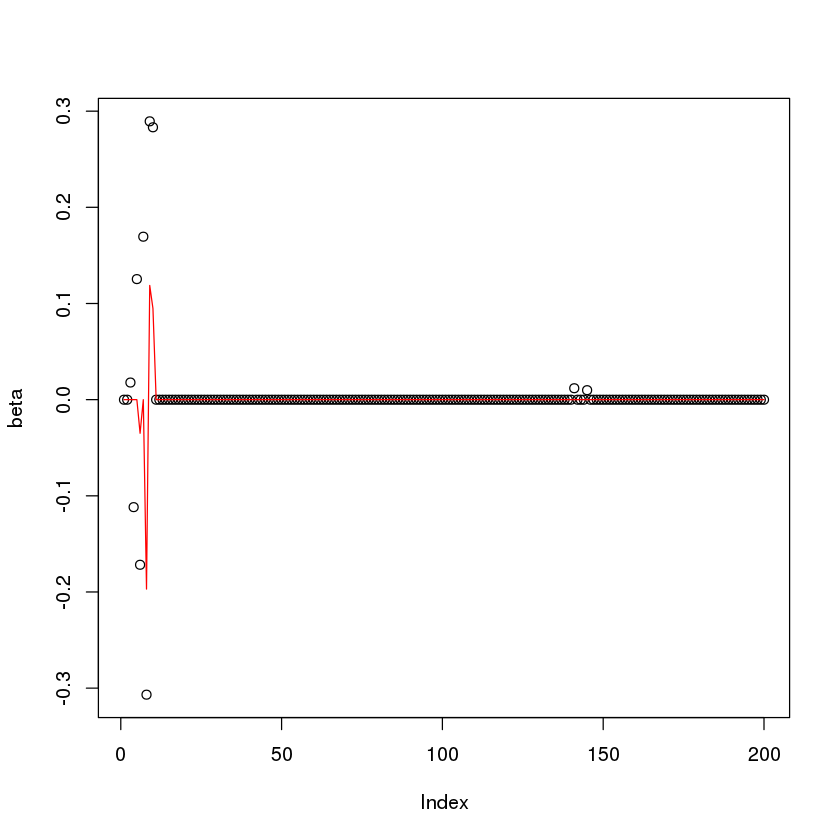

In [8]:
plot(beta, type='p')
lines(beta_augmented, col='red')